**GOOD CANDIDATE FOR CODING EXAM**

## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. 

Each measurement (i.e. each row of the input file) consists of:

1) a flag that specifies the type of message ('HEAD', which in this case is always 1),

2) two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), 

3) and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS').

Each TDC count corresponds to 25/30 ns,

whereas a unit of BX_COUNTER corresponds to 25 ns,

and the ORBIT_CNT is increased every 'x' BX_COUNTER. 

This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt #-P ~/data/

--2022-11-30 16:11:20--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/xvjzaxzz3ysphme/data_000637.txt [segue]
--2022-11-30 16:11:21--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc0a3b4ecfb9fd562876ad34de34.dl.dropboxusercontent.com/cd/0/inline/BxuwCVMeripBnoqR7CkJ63PRJuL7fcmvSZyPNM-Y3W8GdZxh9Z8S0VeHgPynLAGgFvn8ga9RdegZCc3norvPveH6Lq6u0pIDxZ6RaXQSxNxVz4tw7np8CIGXAqo1vX3xGXBPSX1zkW2mO22EycBXD-QR6ymRJRlv9KigEJAyYzCbvw/file# [segue]
--2022-11-30 16:11:22--  https://uc0a3b4ecfb9fd562876ad34de34.dl.dropboxusercontent.com/cd/0/inline/BxuwCVMeripBnoqR7CkJ63PRJuL7fcmvSZyPNM-Y3W

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.


https://www.geeksforgeeks.org/how-to-read-text-files-with-pandas/

our txt file has values separated by comma "," so it is just like a csv

in any case if the separator is space i can read it using sep=" "

In [2]:
import pandas as pd
import numpy as np

df= pd.read_csv("data_000637.txt",sep=",") #read the file
type(df) #the type is a dataframe
print(len(df)) #number of entries (the rows)
df.info() 

1310720
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310720 entries, 0 to 1310719
Data columns (total 6 columns):
HEAD           1310720 non-null int64
FPGA           1310720 non-null int64
TDC_CHANNEL    1310720 non-null int64
ORBIT_CNT      1310720 non-null int64
BX_COUNTER     1310720 non-null int64
TDC_MEAS       1310720 non-null int64
dtypes: int64(6)
memory usage: 60.0 MB


In [4]:
df.head(100) #print the first 100 values

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


https://stackoverflow.com/questions/23853553/python-pandas-how-to-read-only-first-n-rows-of-csv-files-in

https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

https://stackoverflow.com/questions/63590914/get-object-size-from-read-csv-in-pandas

NOTE: about len(df) vs df.size

len(df)= number of rows

df.size= n.rows *ncolums  (in practice all the entries of the table)

In [6]:
len(df)
Nmax=len(df)
Nmin=10000
#N=np.random.randint(Nmin,Nmax)  #generate a random int between min and max
N=Nmax
print("Nmax:",Nmax,"chosen N_:",N)
#create a new dataframe reading only the first N rows
df= pd.read_csv("data_000637.txt",sep=",",nrows=N) #nrows to read only the first Nrowa
print(df)

Nmax: 1310720 chosen N_: 1310720
         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
5           1     0           63  3869200167        2762         4
6           1     0           61  3869200167        2772        14
7           1     0          139  3869200167        2776         0
8           1     0           62  3869200167        2774        21
9           1     0           60  3869200167        2788         7
10          1     1            7  3869200167        2785         4
11          1     0           64  3869200167        2786        19
12          1     1            6  3869200167        2792        18
13          1     0          

2\. Find out the number of BX in a ORBIT (the value 'x').


The BX counter stars from 0 and reaches a maximum, then orbit is increased by 1 and BX restarts from 0

so the period of BX should be equal to (BXmax+1)

In [7]:
df.head(50) #print the first 50 rows
maxBX = df["BX_COUNTER"].max() #find out the maximum value of the column BX_COUNTER

maxTDC = df["TDC_MEAS"].max() #find out the maximum value of the column TDC_MEAS

print(maxBX,maxTDC)
#the number of BX in a ORBIT corresponds to maxBX, since it is the max number before the BX counter is azzerated

3563 29


In [9]:
df.describe()
#check the max value of BX counter

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
count,1310720.0,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06
mean,1.0,2.959198e-01,5.582570e+01,3.869206e+09,1.781096e+03,1.332340e+01
std,0.0,4.564553e-01,3.901034e+01,3.183124e+03,1.027795e+03,9.199886e+00
min,1.0,0.000000e+00,1.000000e+00,3.869200e+09,0.000000e+00,0.000000e+00
25%,1.0,0.000000e+00,2.600000e+01,3.869203e+09,8.930000e+02,5.000000e+00
50%,1.0,0.000000e+00,5.700000e+01,3.869207e+09,1.778000e+03,1.300000e+01
75%,1.0,1.000000e+00,6.400000e+01,3.869209e+09,2.670000e+03,2.100000e+01
max,1.0,1.000000e+00,1.390000e+02,3.869211e+09,3.563000e+03,2.900000e+01


In [12]:
print(df["BX_COUNTER"].max())

print("X, period of BX counter:",(maxBX+1))

3563
X, period of BX counter: 3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

NOTA: il conteggio dei tempi all'inizio non e' necessariamente azzerato!!

quindi per calcolare i tempi non basta prendere il tempo dell'ultima entry

bisogna tenere conto della differenza tra tempo iniziale e tempo finale

una stima sufficientemente buona si ottiene facendo la differenza tra il tempo in termini di orbite tra orbita iniziale e finale


nota che puo' esserci una piccola differenza tra le varie entries dei canali perche' il segnale non arriva tutto assieme

una stima migliore sarebbe prendere il tempo massimo - il tempo minimo tenendo conto di tutti i valori sulle tre colonne

In [15]:
df.tail(3) 
#Shows the last 3 entries
#the last one should contain the time elapsed during the whole data taking

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


https://www.mytecbits.com/internet/python/seconds-to-days-hours-minutes

use datatime as dt library to convert

dt.timedelta(seconds=elapsed_time_s)   to convert in days, hr,min,s

In [42]:
#access to the last entry using df.loc
#loc needs the position in terms of index and name of column
#the indices here are just progressive numbers from 0 to len(df)-1

orbit=df.loc[(len(df)-1),"ORBIT_CNT"] #time in terms of X*BX
bx=df.loc[(len(df)-1),"BX_COUNTER"] #time in ns
tdc=df.loc[(len(df)-1),"TDC_MEAS"] #time in fractions of ns
print(orbit,bx,tdc)

tdc_ns=(25/30)*tdc #convert time in ns since 1tdc=(25/30)ns
bx_ns=25*bx #*25 because bx increases after 30tdc = 30*35/30 ns so 1 bs=25 ns
orbit_ns=(maxBX+1)*25*orbit  #period of bx *25ns *orbit

elapsed_time_ns=tdc_ns+bx_ns+orbit_ns #sum of times (just like 1h +1m+1s = 3600 s +60 s+1s)
print("time last measure [ns]::",elapsed_time_ns)
elapsed_time_s=elapsed_time_ns*10**(-9) #time in seconds
print("time last measure [s]::",elapsed_time_s)

import datetime as dt #useful library to convert dates
result = dt.timedelta(seconds = elapsed_time_s) #convert time in s to time day,hr,min,s
print("time last measure:",result)

3869211171 762 18
time last measure [ns]:: 344746715355165.0
time last measure [s]:: 344746.715355165
time last measure: 3 days, 23:45:46.715355


In [43]:
orbiti=df.loc[0,"ORBIT_CNT"] #time in terms of X*BX
bxi=df.loc[0,"BX_COUNTER"] #time in ns
tdci=df.loc[0,"TDC_MEAS"] #time in fractions of ns
print(orbiti,bxi,tdci)

tdc_nsi=(25/30)*tdci #convert time in ns since 1tdc=(25/30)ns
bx_nsi=25*bxi #*25 because bx increases after 30tdc = 30*35/30 ns so 1 bs=25 ns
orbit_nsi=(maxBX+1)*25*orbiti  #period of bx *25ns *orbit

elapsed_time_nsi=tdc_nsi+bx_nsi+orbit_nsi #sum of times (just like 1h +1m+1s = 3600 s +60 s+1s)
print("time 1st measure [ns]::",elapsed_time_nsi)
elapsed_time_si=elapsed_time_nsi*10**(-9) #time in seconds
print("time 1st measure [s]::",elapsed_time_si)

import datetime as dt #useful library to convert dates
resulti = dt.timedelta(seconds = elapsed_time_si) #convert time in s to time day,hr,min,s
print("time 1st measure:",resulti)

3869200167 2374 26
time 1st measure [ns]:: 344745734939071.7
time 1st measure [s]:: 344745.7349390717
time 1st measure: 3 days, 23:45:45.734939


In [45]:
orbit_t0=df.loc[0,"ORBIT_CNT"]
orbit_tf=df.loc[(len(df)-1),"ORBIT_CNT"]
print("initial time",dt.timedelta(seconds =orbit_t0*25*(maxBX+1)*10**(-9) ))
print("final time",dt.timedelta(seconds =orbit_tf*25*(maxBX+1)*10**(-9) ))

delta_t_ns=(orbit_tf-orbit_t0)*(maxBX+1)*25
delta_t_s=delta_t_ns*10**(-9)
print("data taking duration for :",dt.timedelta(seconds = delta_t_s),"[s]")


print("delta T", (result-resulti),"[s]")

initial time 3 days, 23:45:45.734880
final time 3 days, 23:45:46.715336
data taking duration for : 0:00:00.980456 [s]
delta T 0:00:00.980416 [s]


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

https://stackoverflow.com/questions/34279378/python-pandas-apply-function-with-two-arguments-to-columns

how to apply a function with values into 2 different columns

simple way using delta functions

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [21]:
df['ABS_time[ns]'] = df.apply(lambda x: (25/30)*x["TDC_MEAS"]+25*x["BX_COUNTER"]+(maxBX+1)*25*x["ORBIT_CNT"],axis=1)

#create a new column ABS time
#fill the column with applying our function to the 3 required data fields from the 3 different columns of data

df



,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_time[ns]
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
5,1,0,63,3869200167,2762,4,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
7,1,0,139,3869200167,2776,0,3.447457e+14
8,1,0,62,3869200167,2774,21,3.447457e+14
9,1,0,60,3869200167,2788,7,3.447457e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.


https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

recall randint function, generates random integers

https://stackoverflow.com/questions/32752292/how-to-create-a-dataframe-of-random-integers-with-pandas

create and fill df with random numbers

In [24]:
df["HEAD"]=np.random.randint(2,size=len(df))  #change the entries of head setting random 0,1
#randint(2) 2 means that i generate numbers in [0,2) 2 is excluded, so only 0 and 1
#size must be the n. of entries of that column!!
df.head(1000)
df.tail(20)
df.describe() #check if the mean is around 0.5 (the entries should be only 0 or 1)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_time[ns]
count,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06
mean,5.006470e-01,2.959198e-01,5.582570e+01,3.869206e+09,1.781096e+03,1.332340e+01,3.447463e+14
std,4.999998e-01,4.564553e-01,3.901034e+01,3.183124e+03,1.027795e+03,9.199886e+00,2.836162e+08
min,0.000000e+00,0.000000e+00,1.000000e+00,3.869200e+09,0.000000e+00,0.000000e+00,3.447457e+14
25%,0.000000e+00,0.000000e+00,2.600000e+01,3.869203e+09,8.930000e+02,5.000000e+00,3.447460e+14
50%,1.000000e+00,0.000000e+00,5.700000e+01,3.869207e+09,1.778000e+03,1.300000e+01,3.447463e+14
75%,1.000000e+00,1.000000e+00,6.400000e+01,3.869209e+09,2.670000e+03,2.100000e+01,3.447465e+14
max,1.000000e+00,1.000000e+00,1.390000e+02,3.869211e+09,3.563000e+03,2.900000e+01,3.447467e+14


In [25]:
df.describe() #check, the settings of head have been saved!!

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_time[ns]
count,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06
mean,5.006470e-01,2.959198e-01,5.582570e+01,3.869206e+09,1.781096e+03,1.332340e+01,3.447463e+14
std,4.999998e-01,4.564553e-01,3.901034e+01,3.183124e+03,1.027795e+03,9.199886e+00,2.836162e+08
min,0.000000e+00,0.000000e+00,1.000000e+00,3.869200e+09,0.000000e+00,0.000000e+00,3.447457e+14
25%,0.000000e+00,0.000000e+00,2.600000e+01,3.869203e+09,8.930000e+02,5.000000e+00,3.447460e+14
50%,1.000000e+00,0.000000e+00,5.700000e+01,3.869207e+09,1.778000e+03,1.300000e+01,3.447463e+14
75%,1.000000e+00,1.000000e+00,6.400000e+01,3.869209e+09,2.670000e+03,2.100000e+01,3.447465e+14
max,1.000000e+00,1.000000e+00,1.390000e+02,3.869211e+09,3.563000e+03,2.900000e+01,3.447467e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.


In [52]:
df2=df[df["HEAD"]==1] 
df2.describe() #check the average, max and min of HEAD if equal to 1 ok
#df2.head(30)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_time[ns]
count,655957.0,655957.000000,655957.000000,6.559570e+05,655957.000000,655957.000000,6.559570e+05
mean,1.0,0.295519,55.800699,3.869206e+09,1782.353147,13.332116,3.447463e+14
std,0.0,0.456276,38.982746,3.183743e+03,1027.858135,9.200585,2.836713e+08
min,1.0,0.000000,1.000000,3.869200e+09,0.000000,0.000000,3.447457e+14
25%,1.0,0.000000,26.000000,3.869203e+09,894.000000,5.000000,3.447460e+14
50%,1.0,0.000000,57.000000,3.869207e+09,1780.000000,13.000000,3.447463e+14
75%,1.0,1.000000,64.000000,3.869209e+09,2672.000000,21.000000,3.447465e+14
max,1.0,1.000000,139.000000,3.869211e+09,3563.000000,29.000000,3.447467e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

what is an occupancy plot

https://slideplayer.com/slide/15337864/


there are 2 FPGA, marked with 0 and 1

extract data of each one 


number of counts( y) per tdc channel (x)

x=tdc_channel

y= # of entries for that given channel

in practice it is an histogram, with entries the number of TDC channel


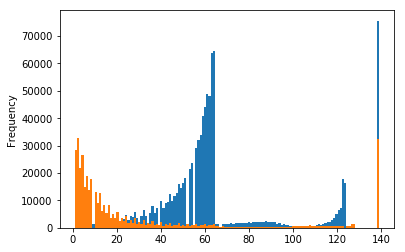

In [28]:
import matplotlib.pyplot as plt #library to do the plots


FPGA0=df[df["FPGA"]==0] #create a new df with only values from FPGA0
FPGA1=df[df["FPGA"]==1] #create a new df with only values from FPGA1

FPGA0.describe()
FPGA1.describe()


FPGA0["TDC_CHANNEL"].plot.hist(bins=139) #use bins =139 since there are 139 channels!! (see max num of channels)
FPGA1["TDC_CHANNEL"].plot.hist(bins=139)


8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

https://www.geeksforgeeks.org/pandas-groupby-count-occurrences-in-column/

https://stackoverflow.com/questions/16424493/pandas-setting-no-of-max-rows

https://stackoverflow.com/questions/40957458/the-first-three-max-value-in-a-column-in-python

In [27]:
pd.set_option('display.max_rows', 500) #display max 500 rows

occur0=FPGA0.groupby(["TDC_CHANNEL"]).size()
#display(occur0)

max0=occur0.nlargest(3)
print("noisy channels of FPGA0 \n",max0)

occur1=FPGA1.groupby(["TDC_CHANNEL"]).size()
#display(occur1)
max1=occur1.nlargest(3)
print("noisy channels of FPGA1 \n",max1)

type(occur0)


noisy channels of FPGA0 
 TDC_CHANNEL
139    75617
64     64581
63     63724
dtype: int64
noisy channels of FPGA1 
 TDC_CHANNEL
2      32669
139    32442
1      28438
dtype: int64


pandas.core.series.Series

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

NOTA: analogia con una fotocamera, immaginando ciascun canale come un pixel, viene scattata una foto con una certa frequenza, nel canale 139 viene inviato un segnale per far scattare la foto (ossia prendere i dati) 


In [32]:
occur0_orbits=FPGA0.groupby(["ORBIT_CNT"]).size() #counts the number of orbits
display(occur0_orbits) #store the number of the single orbit and the number of counts in that orbit
print("Num of unique orbits::",len(occur0_orbits))

occur1_orbits=FPGA1.groupby(["ORBIT_CNT"]).size()
display(occur1_orbits)
print("Num of unique orbits::",len(occur1_orbits))

count139_0=FPGA0[FPGA0["TDC_CHANNEL"]==139] #creat a new df containing only entries of chan 139
display(count139_0)
occur139_0=count139_0.groupby(["ORBIT_CNT"]).size()
display(occur139_0)
print("Num of unique orbits with 139 chan::",len(occur139_0)) #count how many singles orbits have a signal from channel 139


count139_1=FPGA1[FPGA1["TDC_CHANNEL"]==139]
display(count139_1)
occur139_1=count139_1.groupby(["ORBIT_CNT"]).size()
display(occur139_1)
print("Num of unique orbits with 139 chan::",len(occur139_1))

ORBIT_CNT
3869200167     37
3869200168     49
3869200169     90
3869200170     66
3869200171     79
3869200172     63
3869200173     62
3869200174     78
3869200175     89
3869200176     36
3869200177     64
3869200178     75
3869200179     91
3869200180     61
3869200181     81
3869200182     34
3869200183     76
3869200184     52
3869200185     91
3869200186     52
3869200187     70
3869200188    103
3869200189     32
3869200190     67
3869200191    109
3869200192     44
3869200193     93
3869200194    112
3869200195     60
3869200196     51
3869200197     81
3869200198     77
3869200199     79
3869200200     25
3869200201     77
3869200202     67
3869200203     58
3869200204     74
3869200205     77
3869200206     70
3869200207     84
3869200208     99
3869200209     44
3869200210     58
3869200211     81
3869200212     87
3869200213     75
3869200214     41
3869200215     93
3869200216     73
3869200217     26
3869200218    123
3869200219     43
3869200220     84
3869200221     79


Num of unique orbits:: 11001


ORBIT_CNT
3869200167     6
3869200168    36
3869200169    37
3869200170    32
3869200171    30
3869200172    26
3869200173    26
3869200174    50
3869200175    39
3869200176    15
3869200177    47
3869200178    19
3869200179    37
3869200180    24
3869200181    37
3869200182    24
3869200183    47
3869200184    10
3869200185    44
3869200186    43
3869200187    22
3869200188    25
3869200189     6
3869200190    19
3869200191    29
3869200192    23
3869200193    54
3869200194    52
3869200195    17
3869200196     8
3869200197    39
3869200198    51
3869200199    49
3869200200    15
3869200201    26
3869200202    46
3869200203    23
3869200204    28
3869200205     9
3869200206    45
3869200207    23
3869200208    33
3869200209    22
3869200210    24
3869200211    31
3869200212    31
3869200213    29
3869200214    18
3869200215    23
3869200216    36
3869200217    20
3869200218    57
3869200219    15
3869200220    35
3869200221    22
3869200222    61
3869200223     4
3869200224    17
3869

Num of unique orbits:: 10984


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_time[ns]
7,0,0,139,3869200167,2776,0,3.447457e+14
30,1,0,139,3869200167,3085,0,3.447457e+14
39,0,0,139,3869200167,3186,0,3.447457e+14
48,0,0,139,3869200168,23,0,3.447457e+14
86,1,0,139,3869200168,1505,0,3.447457e+14
99,1,0,139,3869200168,1616,0,3.447457e+14
106,0,0,139,3869200168,1675,0,3.447457e+14
126,0,0,139,3869200168,1894,0,3.447457e+14
136,1,0,139,3869200169,143,0,3.447457e+14
153,1,0,139,3869200169,264,0,3.447457e+14


ORBIT_CNT
3869200167     3
3869200168     5
3869200169     9
3869200170     6
3869200171     7
3869200172     9
3869200173     6
3869200174     8
3869200175     7
3869200176     3
3869200177     7
3869200178     6
3869200179     5
3869200180     6
3869200181     7
3869200182     4
3869200183     8
3869200184     4
3869200185     9
3869200186     5
3869200187     7
3869200188     5
3869200189     3
3869200190     4
3869200191    10
3869200192     3
3869200193     8
3869200194     6
3869200195     6
3869200196     5
3869200197    10
3869200198     6
3869200199     7
3869200200     3
3869200201     5
3869200202     5
3869200203     6
3869200204     6
3869200205     8
3869200206     8
3869200207     8
3869200208     6
3869200209     4
3869200210     3
3869200211     5
3869200212     7
3869200213     6
3869200214     4
3869200215     7
3869200216     7
3869200217     3
3869200218    10
3869200219     4
3869200220     9
3869200221     6
3869200222     6
3869200223     3
3869200224     5
3869

Num of unique orbits with 139 chan:: 10961


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_time[ns]
15,0,1,139,3869200167,2797,0,3.447457e+14
56,1,1,139,3869200168,272,0,3.447457e+14
88,0,1,139,3869200168,1505,0,3.447457e+14
116,1,1,139,3869200168,1721,0,3.447457e+14
149,0,1,139,3869200169,266,0,3.447457e+14
248,0,1,139,3869200169,2658,0,3.447457e+14
266,0,1,139,3869200170,875,0,3.447457e+14
297,1,1,139,3869200170,2337,0,3.447457e+14
325,1,1,139,3869200170,3110,0,3.447457e+14
361,0,1,139,3869200171,270,0,3.447457e+14


ORBIT_CNT
3869200167    1
3869200168    3
3869200169    2
3869200170    3
3869200171    2
3869200172    1
3869200173    2
3869200174    6
3869200175    2
3869200176    1
3869200177    6
3869200178    1
3869200179    2
3869200180    3
3869200181    3
3869200182    1
3869200183    6
3869200185    6
3869200186    3
3869200187    2
3869200188    2
3869200190    3
3869200191    3
3869200192    2
3869200193    5
3869200194    4
3869200195    1
3869200197    3
3869200198    3
3869200199    5
3869200200    1
3869200201    3
3869200202    5
3869200203    2
3869200204    3
3869200206    3
3869200207    1
3869200208    3
3869200209    2
3869200210    1
3869200211    3
3869200212    3
3869200213    3
3869200214    1
3869200215    2
3869200216    4
3869200217    2
3869200218    5
3869200220    3
3869200221    1
3869200222    7
3869200224    1
3869200225    3
3869200226    2
3869200227    2
3869200228    2
3869200229    3
3869200230    4
3869200231    2
3869200232    1
3869200233    5
3869200234    

Num of unique orbits with 139 chan:: 10381
